# Coursework 1 - Statistics For AI

## Contents Page

The aim of this report is to identify and explain the trends in patterns of travel using station exit data. People enter the underground in the morning near where they live and exit it near their place of work. We would assume a higher proportion of stations have higher density in the evening and vice versa. This report may be of use to the city planner for deciding travel fares.


 1. Section 1: Calculating Morning and Evening Peak Proportions
     1. Creating a new dataframe with AMPeak and PMPeak proportion columns
     2. Describing the data created in the new data frame
 
 2. Section 2: Plotting and Analysing Distributions
     1. Generating descriptive statistics and plotting histograms 
     2. Review what results show about travel patterns
      
 3. Section 3: A Simple Classification of Stations
     1. Classifying stations into 'work', 'residential' and 'other'
     2. Thresholds and report classification of enquired stations

## Section 1: Calculating Morning and Evening Peak Proportions

### Section 1.1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exits = pd.read_csv('hourlyExits.csv',index_col='Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


In [3]:
peak_counts = pd.DataFrame()

peak_counts.loc[:,'AMCount'] = exits.H07 + exits.H08 + exits.H09
peak_counts.loc[:,'PMCount'] = exits.H16 + exits.H17 + exits.H18

totals = peak_counts.assign(Daily_Total_Exits = exits.apply(sum, axis=1))
peak_counts = peak_counts.assign(Daily_Total_Exits = totals.loc[:,'Daily_Total_Exits'])

#Calculating the AMCount and PMCount as a proportion of the daily total exits
peak_counts = peak_counts.assign(AM_proportion = peak_counts.loc[:,'AMCount'] / peak_counts.loc[:,'Daily_Total_Exits'])
peak_counts = peak_counts.assign(PM_proportion = peak_counts.loc[:,'PMCount'] / peak_counts.loc[:,'Daily_Total_Exits'])

peak_counts


,AMCount,PMCount,Daily_Total_Exits,AM_proportion,PM_proportion
Station,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709
Aldgate,7408,2992,16136,0.459098,0.185424
Aldgate East,7618,3803,21206,0.359238,0.179336
Alperton,856,1847,5118,0.167253,0.360883
Amersham,424,1465,3905,0.108579,0.375160
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985
Wood Green,2165,6494,18989,0.114013,0.341987
Wood Lane,1798,1766,6610,0.272012,0.267171


### Section 1.2

As exit times are bi-modal with a evening and morning peak, the data frame I have created is to target the TFL exit data from the AM Peak and PM Peak periods specifically. The AMPeak focuses on H07,H08 and H09 and the PM peak focuses on H16,H17 and H18. After selecting the key hours and periods to analyse, we created two columns which are the total summation of all the hours stated for their respective peak periods. This creates the columns AMCount and PMCount which makes the travel patterns clearer as we are only differentiating by station and period at this point rather than by each hour. The picture begins to get clearer. 

Along with the total count for AM Peak and PM Peak, we calculate a column of the total daily exits of all the stations which will allow us to take the AMCount and PMcount as a proportion of all daily exits; in 2 further columns. Taking these two periods as a proportion of the whole dataset is the best method to analyse the travel patterns as it scales all the values to accurately compare. We can make sense of the bigger stations relative to the smaller ones using this method. 

Once we have added the columns for the proportions of AMCount and PMcount to the data frame, we begin to analyse what the distributions and descriptive statistics are telling us about travel patterns in the next section.

## Section 2: Plotting and Analysing Distributions

### Section 2.1

,AMCount,PMCount,Daily_Total_Exits,AM_proportion,PM_proportion
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724
min,27.000000,239.000000,596.000000,0.045302,0.084630
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079


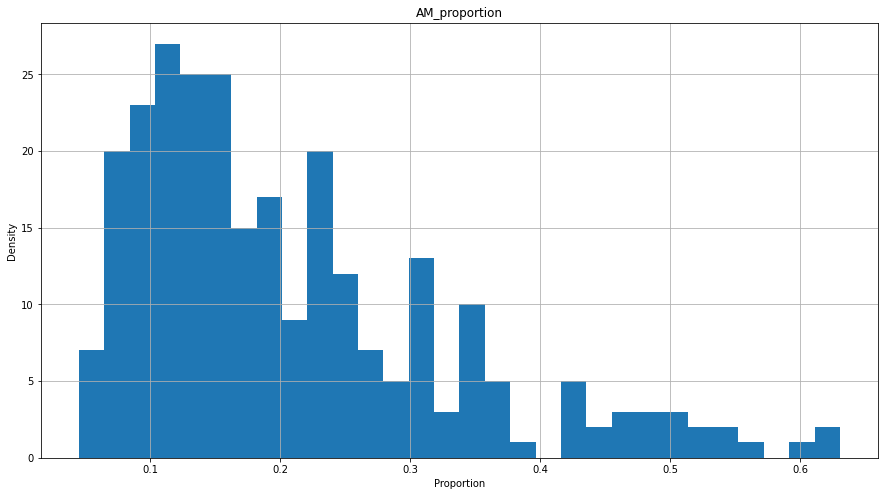

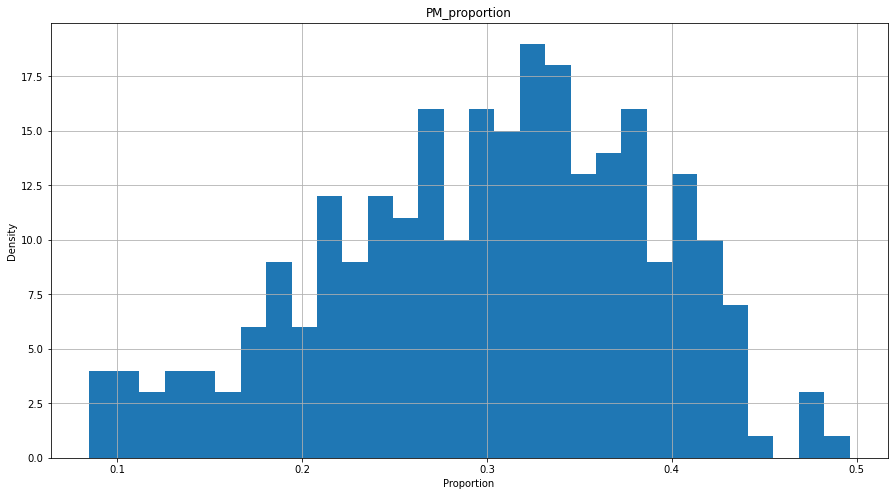

In [4]:
am_proportion = peak_counts.loc[:,'AM_proportion']
pm_proportion = peak_counts.loc[:,'PM_proportion']

hist1 = peak_counts.hist(column = ["AM_proportion"], bins = 30, figsize=(15,8))
plt.xlabel("Proportion")
plt.ylabel("Density")

hist2 = peak_counts.hist(column = ["PM_proportion"], bins = 30, figsize=(15,8))
plt.xlabel("Proportion")
plt.ylabel("Density")

peak_counts.describe()

### Section 2.2

The results in step 1 show that travel patterns differ in the AM_Proportion and the PM_Proportion. From the histogram and descriptive statistics, we can report the following travel patterns:

We can see from the descriptive statistics that majority density of the exits for PM_Proportion lie above the median and upper quartile whilst for AM_proportion they lie in the lower quartile. These travel patterns suggest people exit from more variety of stations in the PM_proportion than the AM_proportion. By the time we have seen 25% of the data (lower quartile) there is already a clear difference in AM_proportion at 0.12 and PM_proportion 0.24.

The shape of the AM_proportion histogram has a positive skew visually and the descriptive statistics also back this up due to the mean 0.207 being higher than the median 0.169. The histogram shows that a low proportion of stations have a high density of exits in the morning which appears to suggest that there are not many variety of stations that people go to in the morning. This can be explained by the fact that most people exit near their place of work or study. A smaller proportion of stations are very busy as shown by the high density at lower proportions. Also, the AM peak has a higher max density of 27 compared to PM peak max density of 19.5, which shows AM Peak stations get busier.

The descriptive statistics show the mean 0.298 and the median 0.307 are nearly equivalent which would suggest more of a no skew for PM_proportion. However the shape of the PM_proportion histogram has a slight negative skew and this appears to suggest that there are lots of different stations people go to in the evening. A large proportion of stations are busy, lots of people exiting during the PM peak. This can be explained by the fact most people will be going home after work or study so there will be more variety of stations used. A reason PM_proportion may not be as skewed as AM_proportion is because some people may like to go to gym or for drinks after work rather than home.

The range of data is larger in the AM peak proportion at 0.59 and 0.41 in the PM peak proportion. In general the range shows that in the travel patterns there is a large spread in the proportion of exits that occur in both the AM Peak and PM peak. 

## Section 3: A Simple Classification of Stations

### Section 3.1

In [5]:
df = peak_counts.copy()
df.loc[:,'AM_proportion'] 
df.loc[:,'PM_proportion']
df = df.assign(Difference = peak_counts.loc[:,'AM_proportion'] - peak_counts.loc[:,'PM_proportion'])

df['Difference'].describe()

#This function classifies stations between work, residential and other. 
def ClassificationCategory(column):
    if (column.Difference) > -0.04 : return 'Work'
    if (column.Difference) < -0.14 : return 'Residential'
    else : return 'Other'

df.apply(ClassificationCategory, axis=1)
df = df.assign(Classification = df.apply(ClassificationCategory, axis=1))
p
#df[df['Classification'].str.contains("Other")]
df
    
#Shows the classification for selected stations along the Northern Line
northern_line = df["Classification"].loc[['Archway','Balham','Embankment','Goodge Street', 'Highgate','High Barnet','Leicester Square','Morden','South Wimbledon','Tottenham Court Road','Warren Street']]
northern_line




Station
Archway                       Other
Balham                  Residential
Embankment                     Work
Goodge Street                  Work
Highgate                Residential
High Barnet             Residential
Leicester Square              Other
Morden                  Residential
South Wimbledon               Other
Tottenham Court Road           Work
Warren Street                  Work
Name: Classification, dtype: object

### Section 3.2

We subtract the PM_proportion from the AM_proportion for all stations to get the 'Differences' column. This means when PM_proportion is > AM_proportion there are more exits at evening and at smaller stations. We classify this as residential. When AM_proportion is > PM_proporion there are more exits in the morning, bigger stations are busier. My method of classification threshold I have chosen is to do +5 percent and -5 percent from the mean value of -0.14. I believe this is a justified threshold as it is enough of a change from the average to be statistically significant.
Any station with a proportion of exits 5% above the mean is classfied as work and 5% under is classfied as residential. All other values are classed as not significant enough difference between the AM and PM and are classfied as 'Other'. 

The results from the northern line stations put forward for classification are what I expected. As we can see majority of the larger stations which are closer to central London have been correctly classfied as 'Work' such as Embankment, Goodge Street, Warren Street and Tottenham Court Road. The Stations we expected to see as residential were accurate and are smaller stations quite a distance away from the 'Work' stations. These include Morden, Balham and Highgate. Located more towards the south and north than centrally. This shows my classification method works on this sample.

From my research into the Transport for London Underground travel patterns, I can conclude that smaller stations located further away from central London are busier during the evenings. There are not many stations with a low proportion and a high density of exits during the PM Peak. Most stations have a high proportion of exits in the PM Peak (busier), which suggests that there are lots of stations that people go to in the evening. This backs up that people are returning from work and study. Conversely, the data and my research in this report also backs up that less stations are in use in the morning. However these stations usually have a larger frequency of exits due to work and are located more centrally in London. My classification and thresholds show that this is statistically significant. These findings may help you to plan fares and prepare staff adequetely for peak times at each station.
